<img src="https://electronaut.info/wp-content/uploads/2017/05/Tubescape_jupyter2.jpg">

<h1><font color = b30000>TUBE DATA MATCHER for uTRACER FILES</font></h1><h5>Anode current for a sweep of grid voltages  when anode voltage = constant</h5>


# STEP 1 — Import and process tube data, build dataframe.

In [2]:
from ElectronauTracer_Importer import *
df.head()


,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,356,5749,325,77.778,47.335,30.168,22.012,16.393,12.337,9.368,7.198,5.658,4.611,3.897,3.394,3.007
1,364,5749,325,78.269,47.972,30.718,22.443,16.722,12.537,9.49,7.301,5.76,4.715,3.994,3.433,2.968
2,366,5749,325,67.519,40.803,25.132,18.204,13.541,10.067,7.483,5.589,4.224,3.3,2.709,2.323,2.033
3,377,5749,325,83.153,52.089,34.211,25.271,19.126,14.664,11.437,9.077,7.391,6.182,5.299,4.613,4.043
4,387,5749,325,76.167,45.68,28.812,21.154,15.813,11.907,9.048,6.974,5.523,4.541,3.851,3.321,2.896



# STEP 2: Show the statistics of the tube data set

In [3]:
# For some reason, .describe is requiring .astype(float) in order to show the stats.
df_stats = df.astype(float).describe()
df_stats.loc[:, 'tube_type'] = df_stats.loc[:, 'tube_type'].astype(int)
df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(int)
df_stats

,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
count,63,63,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,599,5749,325.0,69.768286,41.715873,25.935048,18.650159,13.786270,10.241032,7.650603,5.774238,4.447063,3.539524,2.916413,2.465048,2.123222
std,145,0,0.0,8.408693,6.131187,4.765722,3.825158,3.081033,2.517737,2.086078,1.755510,1.500698,1.301283,1.137565,0.998755,0.879118
min,356,5749,325.0,52.903000,29.836000,16.593000,10.991000,7.715000,5.423000,3.796000,2.628000,1.744000,1.192000,0.887000,0.710000,0.595000
25%,480,5749,325.0,63.000500,37.449000,22.657000,15.844000,11.385000,8.242000,6.057000,4.485000,3.342500,2.566500,2.061500,1.739000,1.488000
50%,583,5749,325.0,68.350000,39.813000,24.953000,18.099000,13.490000,10.067000,7.462000,5.584000,4.253000,3.450000,2.897000,2.497000,2.149000
75%,750,5749,325.0,76.141500,46.680000,29.839500,21.820500,16.237000,12.142500,9.126500,7.007000,5.529500,4.485000,3.626500,2.969000,2.517000
max,799,5749,325.0,89.376000,54.870000,35.920000,26.696000,20.452000,15.868000,12.492000,9.962000,8.086000,6.721000,5.731000,4.969000,4.335000


# STEP 3: Plot a graph of all tubes


In [4]:
# Plot a line graph of all tubes

from bokeh.plotting import figure, output_file, show

output_file("Tube_Batch_Statistics.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df_stats.columns)
stats_columns = []
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

# Add all rows of tubes
for i in range(len(df.index)):
    row = df.iloc[i]
    row = list(row)
    row = row[3:]
    p.line(x_values, row, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 4: Show the distribution of a single bias voltage


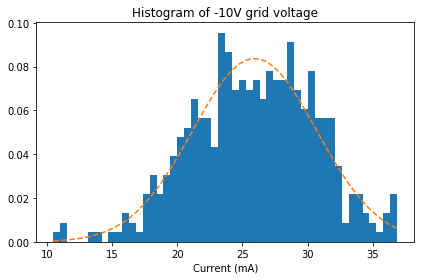

In [5]:
# Histogram of a single column

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

sigma = df_stats.iat[2, 5]
mu = df_stats.iat[1, 5]
x = mu + sigma  * np.random.randn(437)
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Current (mA)')
# ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of -10V grid voltage')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# STEP 5: Calculate the differences between all tubes

In [6]:
from ipywidgets import FloatProgress
from IPython.display import display
import time

start_time = time.time() 

def build_difference_df(df, df_stats):
    
    # Display a progress bar
    build_diff_progress_bar = FloatProgress(min=0, max=100)
    display(build_diff_progress_bar)
       
    # Make a list of all the columns in the dataframe
    cols = list(df.columns)
    
    # Make a list of just the bias columns (*** Should re-write this as a list comprehension)    
#     bias_list2 = [bias_list2.append(i) for i in cols if i.startswith('Bias_') == True]

    bias_list = []
    for i in cols:
        if i.startswith('Bias_') == True:
            bias_list.append(i)
    
    
    # Make an empty list to hold the calculated values, to be used to build the difference dataframe
    diff_squared_list = []
    
    # Iterate through the index of tubes in the master dataframe to select a reference tube
    for each_ref_tube in df.index:
        
        # Get the next reference tube data, as a series
        ref_tube = df.iloc[each_ref_tube]
        ref_tube_ID = ref_tube.tube_ID

        # Iterate through the index of tubes in the master dataframe to select a match tube
        for each_match_tube in df.index:
            
            # Get the next tube data to be compared, as a series
            match_tube = df.iloc[each_match_tube]
            match_tube_ID = match_tube.tube_ID
            
            # Dictionary container to hold the difference variables for each tube
            temp_dict = {}
            
            # Compute the squares of the differences in each current measurement
            error_sum = 0
            for bias in enumerate(bias_list):
                mismatch = ((float(match_tube.loc[bias[1]]) - float(ref_tube.loc[bias[1]]))**2)
                temp_dict[bias[1]] = mismatch
                error_sum = error_sum + mismatch

            # Add other relevant key/value pairs to the dictionary  
            temp_dict['ref_tube_ID'] = ref_tube_ID
            temp_dict['match_tube_ID'] = match_tube_ID
            temp_dict['error_sum'] = error_sum

            # Append the tube's calculated values to the diff_squared_list
            diff_squared_list.append(temp_dict)
            
            # Update the progress bar
            build_diff_progress_bar.value += 1

    
    # Make an ordered list for the columns of the new difference dataframe
    new_cols_to_add = ['ref_tube_ID', 'match_tube_ID', 'error_sum']
    df_dif_cols = new_cols_to_add + bias_list
    df_dif = pd.DataFrame(diff_squared_list, columns = df_dif_cols)

    return df_dif
    
    
df_dif = build_difference_df(df, df_stats)

# Produce a brief report:
total_rows = len(df_dif)
total_columns = len(df_dif.columns)
total_datapoints = total_rows * total_columns
stop_time = time.time()
elapsed_time = stop_time - start_time
print("It took", round(elapsed_time, 2), "seconds to calculate", 
      total_datapoints, "values, resulting in", len(df_dif), "rows.")

# Display the head of the difference dataframe
df_dif.head()

FloatProgress(value=0.0)

It took 3.65 seconds to calculate 63504 values, resulting in 3969 rows.


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,356,356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,356,364,1.342516,0.241081,0.405769,0.302500,0.185761,0.108241,0.040000,0.014884,0.010609,0.010404,0.010816,0.009409,0.001521,0.001521
2,356,366,214.487313,105.247081,42.667024,25.361296,14.500864,8.133904,5.152900,3.553225,2.588881,2.056356,1.718721,1.411344,1.147041,0.948676
3,356,377,109.149882,28.890625,22.600516,16.345849,10.621081,7.469289,5.414929,4.280761,3.530641,3.003289,2.468041,1.965604,1.485961,1.073296
4,356,387,8.626013,2.595321,2.739025,1.838736,0.736164,0.336400,0.184900,0.102400,0.050176,0.018225,0.004900,0.002116,0.005329,0.012321


# STEP 6: Find the best matches for a particular tube_ID

In [ ]:
# This function requires the tube_to_match and tube_set_size variable to be set manually, below.

def find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size):
    tube_to_match = str(tube_to_match)
    
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif[(df_dif.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(tube_set_size)
    
    return df_tube_set

tube_to_match = 460
tube_set_size = 2
df_tube_set = find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size)
df_tube_set.head(tube_set_size)


# STEP 7:  Build a dataframe of the best matched sets in order

In [7]:
# math lib used for generating ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
import math

# Make a local version of df_dif that can be butchered
df_dif_copy = df_dif.copy()

def ask_tube_set_size():
    
    # Ask the user to enter the set size
    tube_set_size = input("Please enter the number of tubes per matched set:")
    
    # Build a list of tube names for the tube set size
    tube_sets_columns = ['Tube_' + str(1 + i) for i in range(int(tube_set_size))]    
    
    return tube_set_size, tube_sets_columns 


def find_best_set_for_chosen_tube_ID(df_dif_copy, tube_to_match, tube_set_size, tube_sets_columns):
    tube_to_match = str(tube_to_match)
        
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif_copy[(df_dif_copy.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(int(tube_set_size))
        
    # Create the dictionary of the tubes in the set and the total score of the set
    tube_set_list = list(df_tube_set.match_tube_ID)
    tube_set_dict = dict(zip(tube_sets_columns, tube_set_list))   
    tube_set_score = df_tube_set.error_sum.sum()
    tube_set_dict.update({'tube_set_score':tube_set_score})

    return tube_set_dict


def find_best_set(df_dif_copy, tube_set_size, tube_sets_columns):
    
    # Make an empty list to hold the tube sets and their scores
    tube_sets_and_scores_list = []
    temp_dict = {}
    
    if 'tube_set_score' in tube_sets_columns:
        tube_sets_columns.remove('tube_set_score')

    for i in df_dif_copy.ref_tube_ID.unique():
        temp_dict = find_best_set_for_chosen_tube_ID(df_dif_copy, i, tube_set_size, tube_sets_columns)
        tube_sets_and_scores_list.append(temp_dict)

    # Add 'tube_set_score' column name at the front of the list
    if 'tube_set_score' not in tube_sets_columns: 
        tube_sets_columns.insert(0, 'tube_set_score')    
    
    # Create a dataframe for the tube sets called df_tube_sets 
    df_tube_sets = pd.DataFrame(tube_sets_and_scores_list, columns=tube_sets_columns)
    
    # Sort the tube_set_score column, take the top row (with the lowest score) as a new df 
    df_best_set_temp = df_tube_sets.sort_values('tube_set_score').head(1)
        
    return df_best_set_temp
 
    
# Start a timer
start_time = time.time()   
    
# Make an empty dataframe to hold all the sets and their scores
df_best_tube_sets = pd.DataFrame()

# Get the tube_set_size and the tube_sets_columns from the ask_tube_set_size function
tube_set_size, tube_sets_columns = ask_tube_set_size()

# Get the best tube set from the batch
df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns) 

# Display a progress bar
progress_bar_range = int(len(df)/int(tube_set_size))
best_matched_progress_bar = FloatProgress(min=0, max=progress_bar_range)
display(best_matched_progress_bar)

# Append the best tube set to the df_best_tube_sets dataframe
df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

# Remove the best tube set from df_dif_copy
tube_delete_list = list(df_best_set_temp.iloc[0])
tube_delete_list.pop(0)
df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]

# A function to generate ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
ordinal_list = [ordinal(n) for n in range(1, int(len(df)))]

set_count = 1
print()
print("*** BEST! ***")
print(ordinal_list[0],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
print("TUBES:", tube_delete_list)

# Update the progress bar
best_matched_progress_bar.value += 1


while len(df_dif_copy.ref_tube_ID.unique()) >= int(tube_set_size):

    # Get all the rest of the sets from the batch
    df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns)
    
    # Append the best tube set to the df_best_tube_sets dataframe
    df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

    # Remove the best tube set from df_dif_copy
    tube_delete_list = list(df_best_set_temp.iloc[0])
    tube_delete_list.pop(0)

    df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
    df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]
    print()
    print(ordinal_list[set_count],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
    print("TUBES:", tube_delete_list)

    set_count += 1
    
    # Update the progress bar
    best_matched_progress_bar.value += 1


stop_time = time.time()
elapsed_time = stop_time - start_time
print()
print("It took", round(elapsed_time, 2), "seconds to produce", set_count, "tube sets.")

best_set = list(df_best_tube_sets.iloc[0])[1:]
worst_set = df_best_tube_sets.tail(1)
worst_set = list(worst_set.iloc[0])[1:]

Please enter the number of tubes per matched set:16


FloatProgress(value=0.0, max=3.0)


*** BEST! ***
1st best tube set SCORE: 129.317067
TUBES: ['445', '710', '435', '745', '417', '774', '770', '598', '574', '476', '799', '366', '769', '509', '786', '522']

2nd best tube set SCORE: 161.654292
TUBES: ['514', '356', '480', '794', '530', '364', '387', '662', '485', '389', '482', '788', '702', '791', '779', '421']

3rd best tube set SCORE: 422.284865
TUBES: ['583', '571', '783', '676', '481', '402', '524', '790', '464', '506', '707', '585', '528', '536', '675', '649']

It took 1.83 seconds to produce 3 tube sets.


## Compute the total currents of every possible combination of quads

#### Make a list of all possible combinations

In [98]:
# make a reference copy of the main df and set the index of the main df to be the tube_ID number
df_copy = df.copy()
df_copy.set_index('tube_ID', inplace=True)

# make a df containing only the best set
best_set_df = df_copy.loc[best_set]

# Make a list of all possible sets of 4 from the best_set list
import itertools
combinations_list = []
for combination in itertools.combinations(best_set, 4):
    combinations_list.append(combination)

# make a list of the bias voltages
bias_list = best_set_df.columns.tolist()[2:]

#### Need a better combination maker, one that includes its best pair.

In [100]:
total_combos = [a for a in itertools.combinations(test_whole_set, 4)]

# Step 1: Determine all possible combinations

# Step 2: Run the total currents on all these combos

# Step 3: Build a remaining_tube list, excluding the tubes in the reference combo

# Step 4: Determine all remaining possible combinations

# Step 5: Run the total current of all remaining combinations

# Step 6: LeastSquares all values and score, then sort and pick best complimentary match



#### Function definitions for counting up all the possible current combinations

In [91]:
# Function to extract the current from a specified tube and bias voltage
def get_current(tube, bias):
    
    # Get the current from the tube at the specified bias (returned as dataframe)
    buzzz = best_set_df.loc[[tube], [bias]]
    
    # Convert to dict (results in nested dict)
    buzz_dict = buzzz.to_dict()
    # Looks like:  {'Bias_x' : {tube_ID : current}}
    
    # Get the name of the first dict key
    buzz_key = str(list(buzz_dict.keys())[0])

    # Extract the nested dict
    buzz_value_dict = buzz_dict[buzz_key]

    # Get the name of the nested dict key
    buzz_value_key = str(list(buzz_value_dict.keys())[0])

    # extract the value and turn it into a float
    buzz = float(buzz_value_dict[buzz_value_key])
    
    return buzz

# Function to total up the currents for a given combo tuple and bias voltage
def add_currents(combo_tuple, bias):
    total_current = 0.0
    for eachtube in combo_tuple:
        zzz = get_current(eachtube, bias)
        total_current += zzz
    return {bias : total_current}

# Function to build a dictionary for each combination containing total currents from each bias voltage
def build_combination_data(eachcombo, bias_list):
    combo_big_dict = {}
    for eachbias in bias_list:
            bias_dict = add_currents(eachcombo, eachbias)
            combo_big_dict.update(bias_dict)
            temp_dict = {'Combination' : eachcombo}
            combo_big_dict.update(temp_dict)
    return combo_big_dict

#### build a dataframe of combinations and the total currents for each bias position

In [92]:
# Build a dataframe showing the summed current for every tube and bias combination
# Prepare the master list for the dataframe
combos_data_list = []
for eachcombo in combinations_list:
    thing = build_combination_data(eachcombo, bias_list)
    combos_data_list.append(thing)

# Make a list of column names for the dataframe    
combo_columns = ['Combination', ] + bias_list

# Build the dataframe
combo_df = pd.DataFrame(combos_data_list, columns=combo_columns)
combo_df    

,Combination,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,"(445, 710, 435, 745)",267.721,155.828,94.462,66.614,48.406,35.207,25.762,19.038,14.322,11.155,9.079,7.602,6.489
1,"(445, 710, 435, 417)",268.789,156.906,95.286,67.208,48.817,35.507,25.994,19.234,14.518,11.356,9.280,7.778,6.637
2,"(445, 710, 435, 774)",268.840,156.825,95.323,67.079,48.455,35.019,25.479,18.759,14.136,11.084,9.082,7.629,6.519
3,"(445, 710, 435, 770)",266.229,155.577,94.401,66.184,47.926,34.866,25.579,18.956,14.319,11.188,9.101,7.607,6.491
4,"(445, 710, 435, 598)",267.992,157.191,96.392,68.263,49.797,36.450,26.861,20.004,15.181,11.888,9.636,7.979,6.728
5,"(445, 710, 435, 574)",264.669,155.645,95.418,67.611,49.320,36.057,26.537,19.745,15.012,11.817,9.707,8.164,6.974
6,"(445, 710, 435, 476)",266.856,154.939,93.916,66.062,47.918,34.822,25.479,18.828,14.150,10.963,8.811,7.261,6.117
7,"(445, 710, 435, 799)",267.704,157.184,96.388,68.405,50.027,36.720,27.218,20.405,15.604,12.316,10.073,8.432,7.193
8,"(445, 710, 435, 366)",267.958,158.181,96.571,68.510,50.078,36.669,27.010,20.086,15.202,11.905,9.739,8.202,7.035
9,"(445, 710, 435, 769)",266.025,154.905,93.774,65.987,47.745,34.568,25.184,18.532,13.912,10.824,8.796,7.344,6.249


In [ ]:
# Iterate through the combo_df and leastsquare all currents from all other currents.
# Use pop when pulling combinations, to remove them from the remaining tube list.


# STEP 8: Plot a line graph of the best set


In [ ]:
# Plot a line graph of the best set

from bokeh.plotting import figure, output_file, show

output_file("Best Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(best_set)):
    row = df[df['tube_ID'] == best_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 9: Plot a line graph of the worst set


In [ ]:
# Plot a line graph of the worst set

from bokeh.plotting import figure, output_file, show

output_file("Worst Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(worst_set)):
    row = df[df['tube_ID'] == worst_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

### Everything below this line is experimental

In [ ]:
df_best_tube_sets.tube_set_score[:15].describe()


In [ ]:
import seaborn as sns
sns.set()

df_sns = df_best_tube_sets[['tube_set_score']][:15].copy()

sns.pairplot(df_sns, 'tube_set_score')
sns.plt.show()


In [ ]:
from bokeh.charts import Histogram, output_file, show

p = Histogram(df_best_tube_sets['tube_set_score'], title="Tube Set Scores")

output_file("histogram.html",)

show(p)

# Other Miscellaneous stuff

##### Apply a function to a column
df.Bias_2.max()

In [ ]:
% lsmagic

In [ ]:
%pprint



In [ ]:
# Applymap is useful for applying a function to all data
# For example, converting all data from floats to ints
# df.loc[2:7, 'Bias_2': 'Bias_50'].applymap(int)

In [ ]:
# List all available magics
% lsmagic

In [ ]:
# Display environmental variables
env_variables = %env
current_path = env_variables.get('PATH')
current_path

In [ ]:
mydict = % env
mydict.keys()

In [ ]:
% env

In [ ]:
# % time x = range(10000)
% timeit x = range(10000)
max(x)